## Solución analítica

Queremos resolver la ecuación diferencial de Riccati:
$$x^3y' = x^4y^2 - 2x^2y - 1.$$
Note que es posible escribirla como:
$$y' = xy^2 - \frac{2}{x}y - \frac{1}{x^3}.$$
Primero, se utilizará una sustitución para simplificar la ecuación diferencial a una lineal de primer orden para facilitar su solución. Para esto considere la sustitución $y = \frac{1}{v}+\frac{1}{x^2}$,
$$\implies \frac{v'}{v}+\frac{2}{x^3} = \frac{1}{x^3} + \frac{2}{x}\left(\frac{1}{v}+\frac{1}{x^2}\right)-x\left(\frac{1}{v}+\frac{1}{x^2}\right)^2$$

$$\iff \frac{v'}{v}+\frac{2}{x^3} = \frac{1}{x^3} + \frac{2}{xv}+\frac{2}{x^3}-\frac{x}{v^2}-\frac{1}{x^3}- \frac{2}{xv}$$

Cancelando los términos repetidos:
$$\implies \frac{v'}{v} = -\frac{x}{v^2} \iff v'=-x.$$

Obteniendo una ecuación diferencial separable, por lo que se puede solucionar como:

$$\frac{dv}{dx} = -x \iff \int dv = -\int x dx \iff v(x) = -\frac{x^2}{2}+c=\frac{c-x^2}{2}$$

Ahora, reemplazando esta expresión encontrada para $v(x)$ en la sustitución inicial:

$$y(x) = \frac{1}{c-x^2}+\frac{1}{x^2}.$$

Es claro que una solución particular está dada por $y_1 = x^{-2}$, sin embargo, para realizar la solución numética, en la tomaremos la condición inicial $y(\sqrt{2})=0$, encontremos el valor de $c$ para realizar una comparación entre el método y la solución exacta:

$$y(\sqrt{2})=0=\frac{2}{c-2}+\frac{1}{2}\iff 2-c=4 \implies c=-2$$

Es decir que se obtiene la solución:

$$\therefore y(x) = \frac{1}{x^2}-\frac{1}{2+x^2}$$

## Solución numérica haciendo uso del Método de Euler

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
N = 100
t = np.linspace(0,20,N)
r = (0,np.sqrt(2))

In [3]:
def f(x, y):
    return x*y**2 - 2*y/x - 1/(x**3)

def y(x):
    return (1/x**2) - 2/(2+x**2)

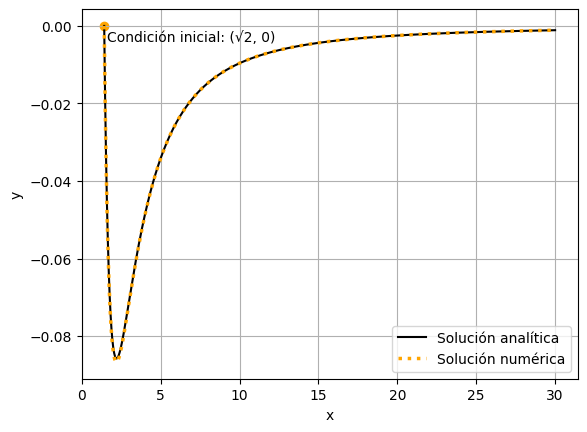

In [4]:
def GetEuler(f, x0, y0, h, xf):
    n = int((xf - x0) / h) + 1
    
    x_ = np.linspace(x0, xf, n)
    y_ = np.zeros(n)
    y_[0] = y0
    
    for i in range(1, n):
        y_[i] = y_[i - 1] + h * f(x_[i - 1], y_[i - 1])
        
    return x_, y_

# Condiciones iniciales
x0 = np.sqrt(2)
y0 = 0
xf = 30  # Valor final de x
h = 0.01  # Tamaño del paso

# Aplicar el método de Euler
x_num, y_num = GetEuler(f, x0, y0, h, xf)



# Graficar la solución analítica
X_analitico = np.linspace(x0, xf, 1000)
Y_analitico = y(X_analitico)

plt.plot(X_analitico,Y_analitico, label='Solución analítica', color = 'k')


# Graficar la solución numerica
plt.plot(x_num, y_num, label='Solución numérica', linestyle=':', linewidth=2.5, color = 'orange')
plt.grid(True)

plt.scatter(np.sqrt(2),0, color = 'orange')
plt.xlabel('x')
plt.ylabel('y')

plt.annotate('Condición inicial: (√2, 0)', (np.sqrt(2)+0.2,-0.004))


plt.legend()
plt.show()
